In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


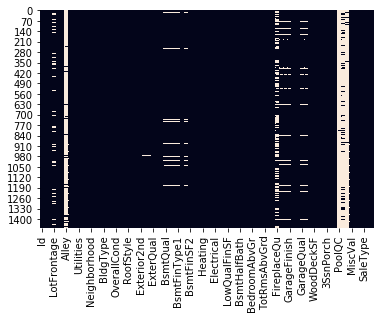

In [4]:
sns.heatmap(train.isnull(), cbar=False)

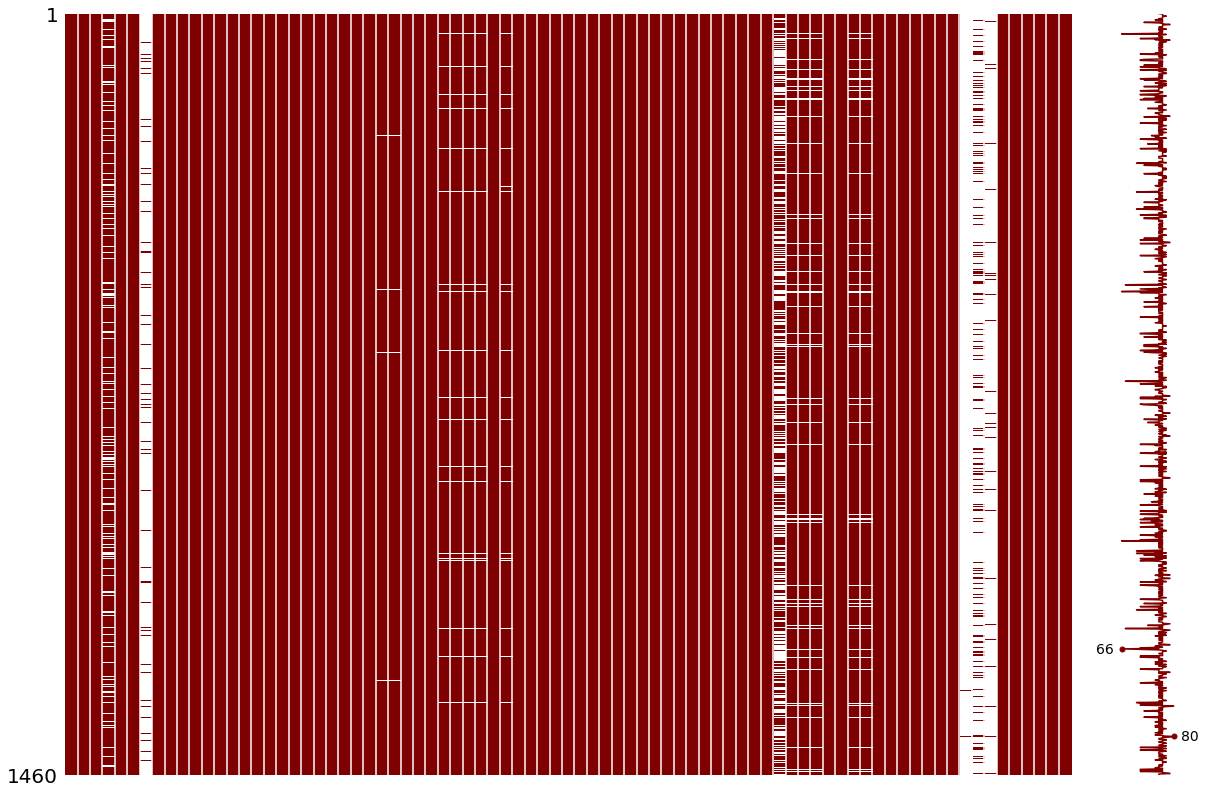

In [5]:
msno.matrix(df=train, figsize=(20, 14), color=(0.5, 0, 0))

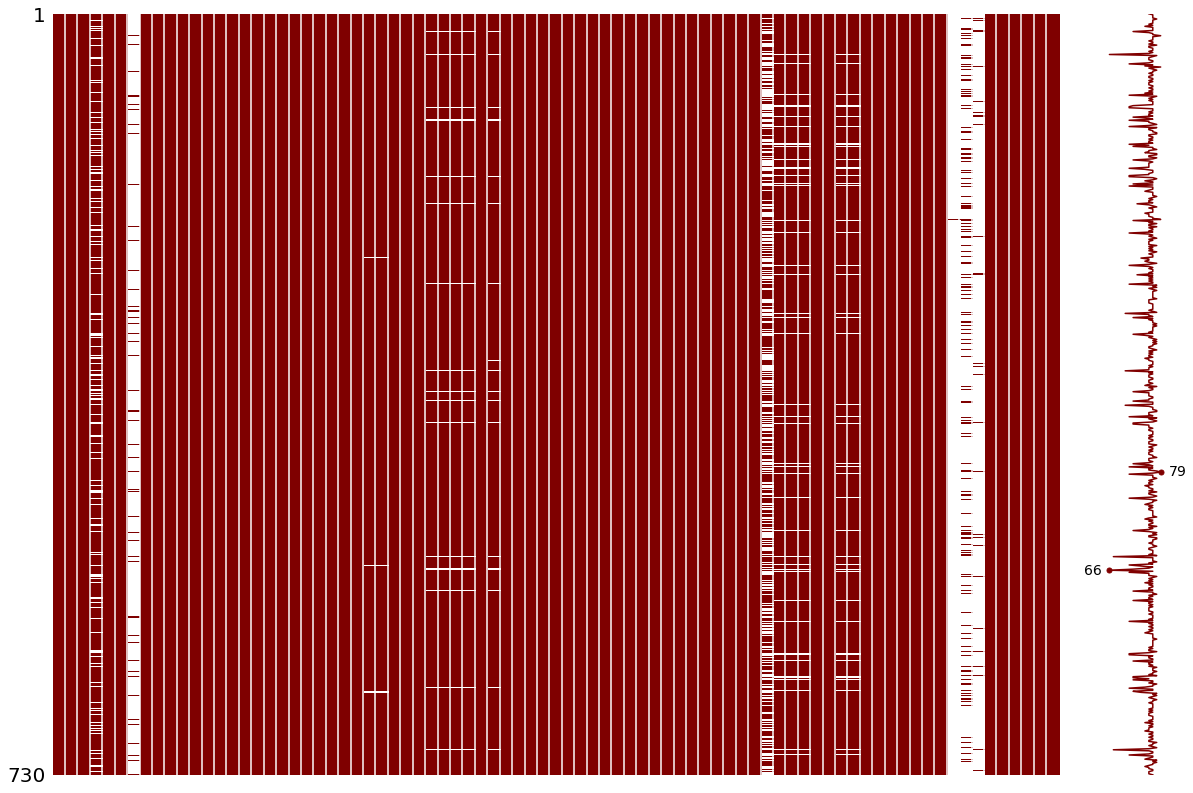

In [6]:
msno.matrix(df=train[:len(train)//2], figsize=(20, 14), color=(0.5, 0, 0))

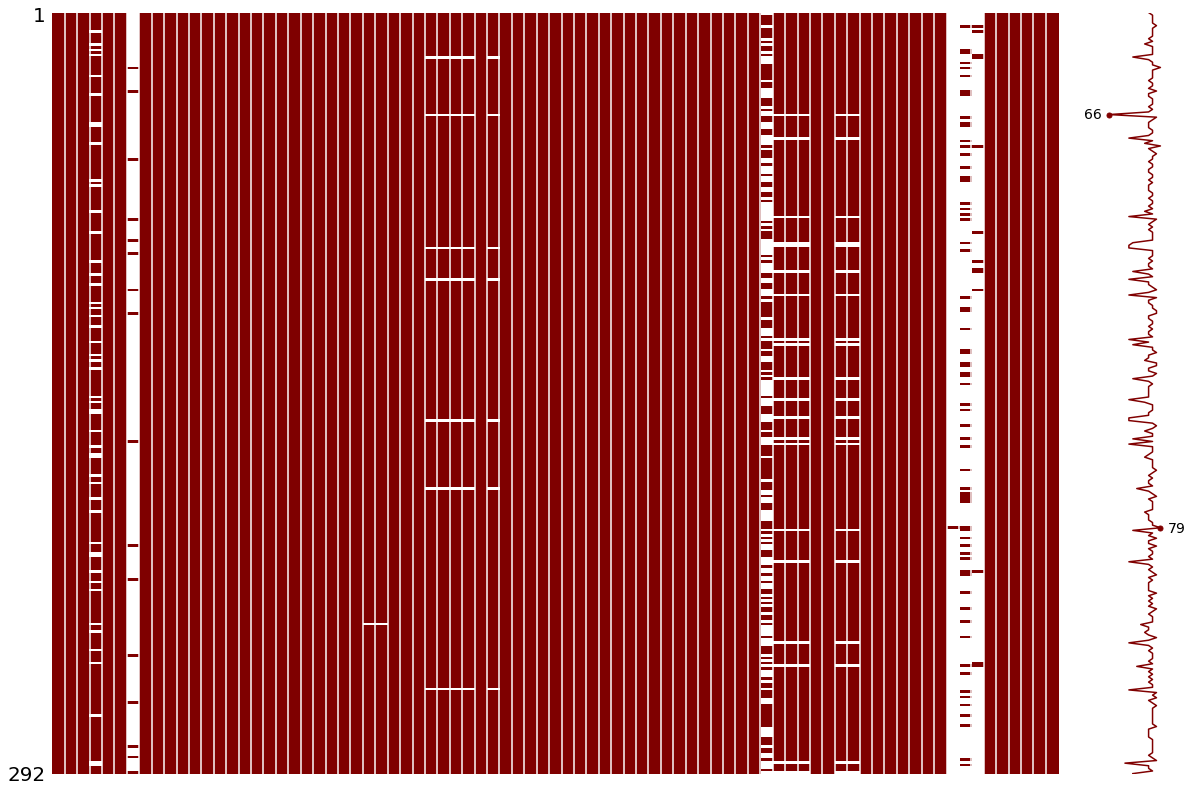

In [7]:
msno.matrix(df=train[:len(train)//5], figsize=(20, 14), color=(0.5, 0, 0))

In [8]:
print(len(train))

1460


In [9]:
print(len(train[0]))

KeyError: 0

In [11]:
ax = sns.distplot(y_train)
ax.show()

NameError: name 'y_train' is not defined

In [12]:
train_x = train.drop([target_key], axis=1)
train_y = train[target_key]


NameError: name 'target_key' is not defined

In [13]:
target_key = 'SalePrice'
train_x = train.drop([target_key], axis=1)
train_y = train[target_key]


In [14]:
ax = sns.distplot(y_train)
ax.show()

NameError: name 'y_train' is not defined

AttributeError: 'AxesSubplot' object has no attribute 'show'

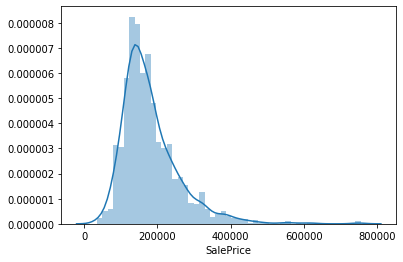

In [15]:
ax = sns.distplot(train_y)
ax.show()

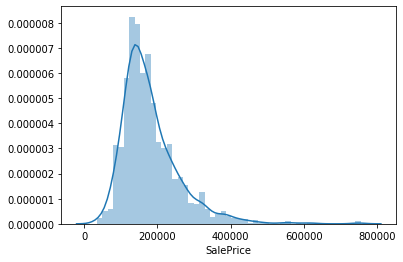

In [16]:
sns.distplot(train_y)

In [17]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(train_x, train_y)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'RL'

In [19]:
concat_x = pd.concat([train_x, test_x], axis=0)

NameError: name 'test_x' is not defined

In [20]:
test_x = test.copy()
concat_x = pd.concat([train_x, test_x], axis=0)

In [21]:
from sklearn.preprocessing import LabelEncoder

for i in range(test_x.shape[1]):
    if test_x.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train_x.iloc[:,i].values) + list(test_x.iloc[:,i].values))
        train_x.iloc[:,i] = lbl.transform(list(train_x.iloc[:,i].values))
        test_x.iloc[:,i] = lbl.transform(list(test_x.iloc[:,i].values))

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(train_x, test_x)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=train_x.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [23]:
train_x = train_x.drop(['Id','SalePrice','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
test_x = test_x.drop(['Id','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)

KeyError: "['SalePrice'] not found in axis"

In [24]:
train_x = train_x.drop(['Id','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
test_x = test_x.drop(['Id','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(train_x, test_x)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=train_x.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').